<a href="https://colab.research.google.com/github/pramud/100DaysOfKotlinAndVertx/blob/Day%231/RNN_Unbounded_vocab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
# !pip install tensorflow-addons


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_addons as tfa

# import psutil
# import humanize
# import os, time
# import GPUtil as GPU

print(tf.__version__)

2.3.0


In [ ]:
# GPUs = GPU.getGPUs()
# # only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def worker():
#   while True:
#     process = psutil.Process(os.getpid())
#     print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
#     print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
#     time.sleep(6)

# import threading
# t = threading.Thread(target=worker, name='Monitor')
# t.start()

In [ ]:
# import os
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
data_df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/nela10.csv")

In [ ]:
data_df.Reliability.value_counts()

0    44582
2    12575
Name: Reliability, dtype: int64

In [ ]:
data_df.Reliability = data_df.Reliability.map({0:0, 2:1})

In [ ]:
data_df.shape

(57157, 11)

In [ ]:
data_df.content.drop_duplicates().shape

(54823,)

In [ ]:
data_df['content'] = data_df['content'].str.replace('\n', ' ').str.strip()

In [ ]:
data_df[(data_df.content.str.len()> 0) & (data_df.content.str.len()< 30)][['content','Reliability']]

,content,Reliability
4399,# Rod Rosenstein to step down,0
4623,# Veteran being held in Iran,0
16909,# Democrats Without Clothes,0
17054,Visit the post for more.,0
17059,# The Making of Amazon Prime,0
17109,Visit the post for more.,0
17133,# End the War in Afghanistan,0
17354,The State of the Shutdown,0
17441,# Trump's Not-So-Bully Pulpit,0
17534,The Art of the Fail?,0


In [ ]:
data_df.drop( data_df[data_df.content.str.len() < 30].index, inplace=True)

In [ ]:
data_df.head()

,id,date,source,title,content,author,url,published,published_utc,collection_utc,Reliability
0,abcnews--2019-01-30--Who is Stacey Abrams the ...,2019-01-30,abcnews,"Who is Stacey Abrams, the Democrat who will re...","Last November, Stacey Abrams, a Democrat who r...",Cheyenne Haslett,https://abcnews.go.com/Politics/stacey-abrams-...,2019-01-30 19:10:47+00:00,1548893447,1567550233,0
1,abcnews--2019-01-30--Ban government shutdowns ...,2019-01-30,abcnews,Ban government shutdowns? Some Republicans and...,As lawmakers scramble to negotiate a border se...,"Benjamin Siegel,\nTrish Turner\n",https://abcnews.go.com/Politics/ban-government...,2019-01-30 17:29:04+00:00,1548887344,1567550233,0
2,abcnews--2019-01-30--Democrats renew push for ...,2019-01-30,abcnews,Democrats renew push for equal pay for equal work,Ten years after President Barack Obama signed ...,John Parkinson,https://abcnews.go.com/Politics/dems-renew-pus...,2019-01-30 21:35:45+00:00,1548902145,1567550233,0
3,abcnews--2019-01-30--Trump attacks intel chief...,2019-01-30,abcnews,Trump attacks intel chiefs after they contradi...,"President Donald Trump on Wednesday declared ""...",Meridith Mcgraw,https://abcnews.go.com/Politics/trump-attacks-...,2019-01-30 17:03:40+00:00,1548885820,1567550233,0
4,abcnews--2019-01-30--Border security battle be...,2019-01-30,abcnews,Border security battle begins as Congress grap...,Republicans and Democrats on the exclusive com...,"John Parkinson,\nBenjamin Siegel\n",https://abcnews.go.com/Politics/border-securit...,2019-01-30 15:09:47+00:00,1548878987,1567550233,0


In [ ]:
#Keep only content, Reliability as columns
data_df = data_df.drop(['id','date','source','title','author','url','published','published_utc','collection_utc'],axis=1)

In [ ]:
data_df.head()

,content,Reliability
0,"Last November, Stacey Abrams, a Democrat who r...",0
1,As lawmakers scramble to negotiate a border se...,0
2,Ten years after President Barack Obama signed ...,0
3,"President Donald Trump on Wednesday declared ""...",0
4,Republicans and Democrats on the exclusive com...,0


In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = train_test_split(data_df['content'], data_df['Reliability'], test_size=0.20, random_state=42)

In [ ]:
train_y.value_counts(), valid_y.value_counts()

(0    35609
 1    10023
 Name: Reliability, dtype: int64, 0    8869
 1    2539
 Name: Reliability, dtype: int64)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x.values, train_y.values))
test_dataset = tf.data.Dataset.from_tensor_slices((valid_x.values, valid_y.values))

In [ ]:
for feat, targ in train_dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: b'Thousands of festival-goers at Glastonbury formed Extinction Rebellion\'s hourglass symbol in a bid to draw attention to climate change issues.  The protest group joined forces with long-time event partner Greenpeace in a call to join a climate-climate rebellion.  The campaigners marched through Worthy Farm led by Extinction Rebellion\'s pink "Tell the Truth" boat, which was last seen in London\'s Oxford Circus when the group brought parts of the British capital to a standstill in April.  They called on ordinary people to join a youth strike planned for September, which they said aimed to force government and business to take the climate emergency seriously.  Activist Lizzy Haughton said while sitting in the middle of the symbol: "I think people are finally beginning to realise that, in order to tackle the climate and ecological emergency, we are going to have to be radical."  Gail Bradbrook, Extinction Rebellion co-founder, said the demonstration had been made particularly

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"I witnessed the Republican Party become increasingly hostile to centrists. Now I'm seeing the same thing happening on the left."
 b'The United States has issued satellite images and cited intelligence to back its allegation Iran was behind attacks on major Saudi oil facilities.  Iran denies involvement in Saturday\'s air attacks, which were claimed by Iran-aligned Houthi rebels in Yemen.  But unnamed US officials speaking to US and international media say the direction and extent of the attacks cast doubt on Houthi involvement.  The incident has cut global oil supplies by 5% and prices have soared.  Secretary of State Mike Pompeo blamed Iran at the weekend, without providing any evidence, prompting Tehran to accuse Washington of deceit.  Tweeting on Sunday, President Donald Trump stopped short of directly accusing Iran, but suggested possible military action once the perpetrator was known.  Unnamed US officials have been speaking to the New York Times, ABC and Reuters.  One 

**Create the text encoder**

In [ ]:
# VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization()
encoder.adapt(train_dataset.map(lambda text, label: text))

The .adapt method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency:

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'in', 'that', 'for',
       'is', 'on', 'with', 'was', 'it', 'as', 'he', 'said', 'at', 'be'],
      dtype='<U2647')

Once the vocabulary is set, the layer can encode text into indices. The tensors of indices are 0-padded to the longest sequence in the batch (unless you set a fixed output_sequence_length):

In [ ]:
encoded_example = encoder(train_x.to_list()[1])[:3].numpy()
encoded_example

array([   6,  203, 5567])

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=2, average="micro", threshold=0.5 )])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
713/713 [==============================] - 327s 458ms/step - loss: 0.4277 - accuracy: 0.8005 - f1_score: 0.1773 - val_loss: 0.2961 - val_accuracy: 0.8672 - val_f1_score: 0.6154
Epoch 2/10
713/713 [==============================] - 325s 455ms/step - loss: 0.2178 - accuracy: 0.9061 - f1_score: 0.7555 - val_loss: 0.2437 - val_accuracy: 0.9057 - val_f1_score: 0.7735
Epoch 3/10
713/713 [==============================] - 326s 457ms/step - loss: 0.1152 - accuracy: 0.9563 - f1_score: 0.8965 - val_loss: 0.2548 - val_accuracy: 0.9109 - val_f1_score: 0.7952
Epoch 4/10
713/713 [==============================] - 319s 447ms/step - loss: 0.0528 - accuracy: 0.9827 - f1_score: 0.9600 - val_loss: 0.3199 - val_accuracy: 0.9026 - val_f1_score: 0.7612
Epoch 5/10
713/713 [==============================] - 314s 440ms/step - loss: 0.0239 - accuracy: 0.9935 - f1_score: 0.9851 - val_loss: 0.3459 - val_accuracy: 0.9010 - val_f1_score: 0.7826
Epoch 6/10
713/713 [==============================] - 320s 4

In [ ]:
test_loss, test_acc, test_f1_score = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

179/179 [==============================] - 24s 135ms/step - loss: 0.5080 - accuracy: 0.9057 - f1_score: 0.7756
Test Loss: 0.5079890489578247
Test Accuracy: 0.905680239200592


(0.0, 0.571923783281818)

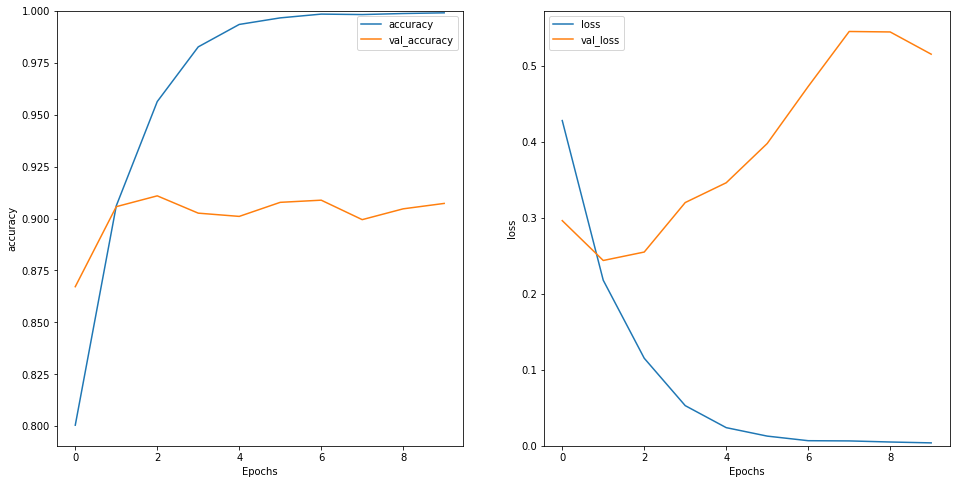

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [ ]:
#saving a model in HDF5 format
#model is a tf.keras.Model object created using any of the above methods
model.save("/content/drive/My Drive/Colab_Notebooks/rnn_lstm_v1.tf", save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab_Notebooks/rnn_lstm_v1.tf/assets


In [ ]:
tf.__version__

'2.3.0'

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
713/713 [==============================] - 333s 467ms/step - loss: 0.0019 - accuracy: 0.9995 - f1_score: 0.9989 - val_loss: 0.5447 - val_accuracy: 0.9021 - val_f1_score: 0.7656
Epoch 2/10
713/713 [==============================] - 333s 467ms/step - loss: 0.0022 - accuracy: 0.9995 - f1_score: 0.9988 - val_loss: 0.5959 - val_accuracy: 0.9042 - val_f1_score: 0.7683
Epoch 3/10
 48/713 [=>............................] - ETA: 4:55 - loss: 0.0019 - accuracy: 0.9997 - f1_score: 0.9992

In [ ]:
test_loss, test_acc, test_f1_score = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

179/179 [==============================] - 24s 133ms/step - loss: 0.6065 - accuracy: 0.8985 - f1_score: 0.7738
Test Loss: 0.6064867377281189
Test Accuracy: 0.8984922766685486


(0.0, 0.6729472430131864)

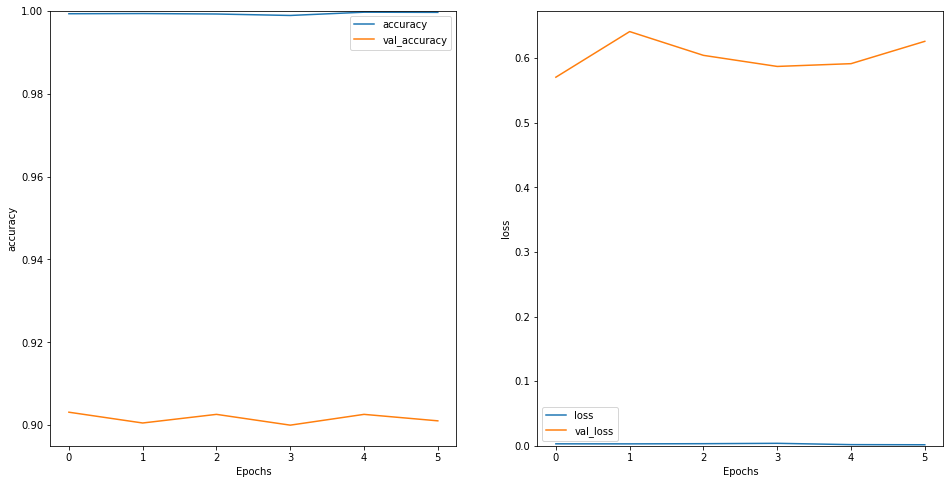

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

**Stacking more LSTM layers**

In [ ]:
model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tfa.metrics.F1Score(num_classes=2, average="micro", threshold=0.5 )])

In [ ]:
history2 = model2.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
713/713 [==============================] - 454s 637ms/step - loss: 0.4381 - accuracy: 0.8078 - f1_score: 0.2425 - val_loss: 0.3060 - val_accuracy: 0.8833 - val_f1_score: 0.6981
Epoch 2/10
713/713 [==============================] - 461s 646ms/step - loss: 0.2501 - accuracy: 0.8989 - f1_score: 0.7313 - val_loss: 0.2597 - val_accuracy: 0.9021 - val_f1_score: 0.7584
Epoch 3/10
713/713 [==============================] - 453s 636ms/step - loss: 0.1459 - accuracy: 0.9450 - f1_score: 0.8657 - val_loss: 0.2601 - val_accuracy: 0.9010 - val_f1_score: 0.7683
Epoch 4/10
713/713 [==============================] - 463s 649ms/step - loss: 0.0784 - accuracy: 0.9736 - f1_score: 0.9380 - val_loss: 0.3234 - val_accuracy: 0.8984 - val_f1_score: 0.7787
Epoch 5/10
713/713 [==============================] - 463s 649ms/step - loss: 0.0403 - accuracy: 0.9878 - f1_score: 0.9719 - val_loss: 0.3558 - val_accuracy: 0.9026 - val_f1_score: 0.7739
Epoch 6/10
713/713 [==============================] - 464s 6

In [ ]:
test_loss, test_acc, test_f1_score = model2.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

179/179 [==============================] - 44s 246ms/step - loss: 0.5861 - accuracy: 0.9109 - f1_score: 0.7925
Test Loss: 0.5861338973045349
Test Accuracy: 0.9109396934509277


(0.0, 0.6643943425267935)

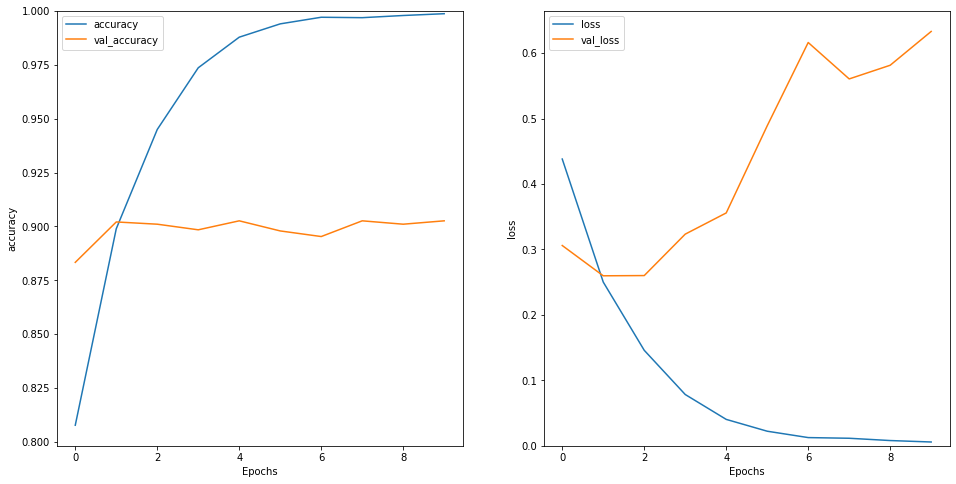

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history2, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history2, 'loss')
plt.ylim(0,None)

In [ ]:
#saving a model in HDF5 format
#model is a tf.keras.Model object created using any of the above methods
model.save("/content/drive/My Drive/Colab_Notebooks/rnn_lstm2_v1.tf", save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab_Notebooks/rnn_lstm2_v1.tf/assets


**GRU**